In [34]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### 1. Read csv to numpy

In [42]:
data = "stock.csv"
dfStock = pd.read_csv(data)
sahamName =  dfStock['Saham']
dfStock = dfStock.loc[:, dfStock.columns != 'Saham']

print(dfStock.shape)
dfStock.head()

(60, 963)


1/4/2010  1/5/2010  1/6/2010  1/7/2010  1/8/2010  1/11/2010  1/12/2010  \
0  0.580000 -0.220005 -3.409998 -1.170000  1.680011  -2.689994  -1.469994   
1 -0.640002 -0.650000 -0.210001 -0.420000  0.710001  -0.200001  -1.130001   
2 -2.350006  1.260009 -2.350006 -2.009995  2.960006  -2.309997  -1.640007   
3  0.109997  0.000000  0.260002  0.720002  0.190003  -0.270001   0.750000   
4  0.459999  1.770000  1.549999  2.690003  0.059997  -1.080002   0.360000   

   1/13/2010  1/14/2010  1/15/2010     ...      10/16/2013  10/17/2013  \
0   2.779997  -0.680003  -4.999995     ...        0.320008    4.519997   
1   0.069999  -0.119999  -0.500000     ...        0.919998    0.709999   
2   1.209999  -1.790001  -2.039994     ...        2.109985    3.699982   
3   0.300004   0.639999  -0.130001     ...        0.680001    2.290001   
4   0.549999   0.530002  -0.709999     ...        1.559997    2.480003   

   10/18/2013  10/21/2013  10/22/2013  10/23/2013  10/24/2013  10/25/2013  \
0    2.899987    9.590019   -6.540016    5.959976    6.910011   -5.359962   
1    0.119999   -0.480000    0.010002   -0.279998   -0.190003   -0.040001   
2    9.570008   -3.450013    4.820008   -4.079986    2.579986    4.790009   
3    0.409996   -0.069999    0.100006    0.069999    0.130005    1.849999   
4    0.019997   -1.220001    0.480003    3.020004   -0.029999    1.940002   

   10/28/2013  10/29/2013  
0    0.840019  -19.589981  
1   -0.400002    0.660000  
2   -1.760009    3.740021  
3    0.040001    0.540001  
4    1.130005    0.309998  

[5 rows x 963 columns]

In [3]:
dfStock.values

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

### 2. Normalisasi

In [4]:
transformer = Normalizer().fit(dfStock.values) # fit does nothing.
dfStockNorm = transformer.transform(dfStock.values)
dfStockNorm

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

#### 2.1 Plot data awal (setelah direduksi)

In [74]:
reducedStock = PCA(n_components=2).fit_transform(dfStockNorm)
fig = plt.figure(figsize=(13,8))
plt.scatter(reducedStock[:, 0], reducedStock[:, 1], s=50);

### 3. K Means k=5

In [84]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(reducedStock)
y_kmeans = kmeans.predict(reducedStock)


fig = plt.figure(figsize=(13,8))
# plot hasil clustering k=5
plt.scatter(reducedStock[:, 0], reducedStock[:, 1], c=y_kmeans, s=50, cmap='viridis')
# plot centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

#### 3.1 Plot hasil clustering (k dicoba2)

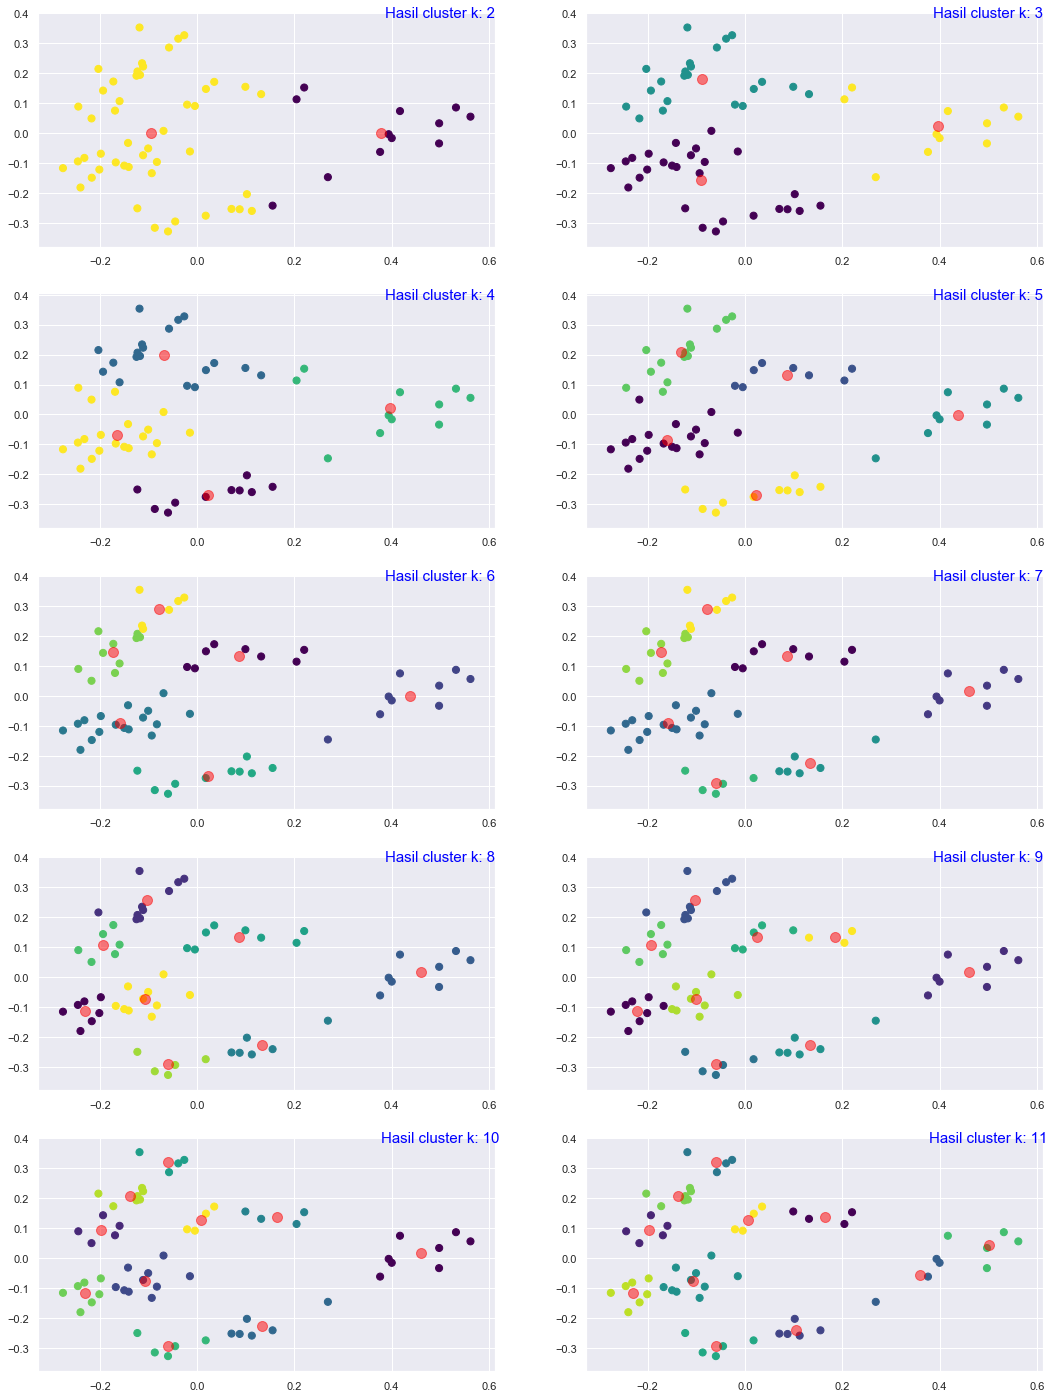

In [96]:
fig = plt.figure(figsize=(18,25))
columns = 2
rows = 5

for i in range(2,12):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(reducedStock)
    y_kmeans = kmeans.predict(reducedStock)
    centers  = kmeans.cluster_centers_

    # plot hasil cluster
    fig.add_subplot(rows, columns, i-1).text(0.5, 0.4, "Hasil cluster k: "+str(i), ha='center', va='center',size=15,color="blue")
    plt.scatter(reducedStock[:, 0], reducedStock[:, 1], c=y_kmeans, s=50, cmap='viridis')
    # plot centroid
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);
    
plt.show()